In [83]:
import cv2
import os
import numpy as np
import skimage
from skimage import io, transform, color, filters, data, morphology, measure
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def load_images_from_folder(folder):
    images = []
    images_name = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            images_name.append(filename[0:4])
    
    images_df = pd.DataFrame({"name": images_name,
                             "image": images})
    #print(images_df)
    return images_df

def display(np_image):
    """
    This is a display function that we have added to show numpy images at full size
    If you pass in an image with 3 channels, it will be displayed in RGB
    If you passn in an image with 1 channel, it will be displayed in grayscale
    """
    dpi = matplotlib.rcParams['figure.dpi']
    if len(np_image.shape) == 3:
        height, width, depth = np_image.shape
    else:
        height, width = np_image.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')
    
    # Display the image in either RGB or grayscale (depending on the amount of dimensions)
    if (len(np_image.shape) >= 3):
        ax.imshow(np_image)
    else:
        ax.imshow(np_image, cmap='gray')

    plt.show()

all_images_df = load_images_from_folder('../dataset-images/dataset1')
all_images_df
#print(len(list_images))
#print(list_images[0])
#print(list_images_name)
#print('----------done---------')

,name,image
0,1000,"[[[241, 241, 241], [242, 242, 242], [244, 244,..."
1,1027,"[[[206, 206, 206], [211, 211, 211], [218, 218,..."
2,1029,"[[[82, 82, 82], [83, 83, 83], [84, 84, 84], [8..."
3,1036,"[[[241, 241, 241], [246, 246, 246], [243, 243,..."
4,1053,"[[[241, 241, 241], [243, 243, 243], [243, 243,..."
...,...,...
235,5264,"[[[228, 228, 228], [227, 227, 227], [224, 224,..."
236,5339,"[[[70, 70, 70], [71, 71, 71], [67, 67, 67], [7..."
237,5377,"[[[243, 243, 243], [236, 236, 236], [243, 243,..."
238,5382,"[[[214, 214, 214], [222, 222, 222], [206, 206,..."


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


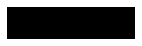

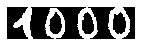

lol:  1
lol:  0
lol:  0
lol:  0


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,45.0,7.0,0.0,29.0,62.0,0.0,7.0,30.0,56.0,0.0,0.0,0.0,42.0,5.0
1,0.0,39.0,27.0,0.0,3.0,33.0,20.0,9.0,13.0,23.0,12.0,16.0,3.0,41.0,41.0,4.0
2,1.0,40.0,32.0,0.0,8.0,33.0,21.0,8.0,9.0,25.0,9.0,17.0,0.0,43.0,41.0,8.0
3,5.0,52.0,41.0,0.0,16.0,20.0,18.0,18.0,20.0,18.0,11.0,23.0,2.0,44.0,43.0,7.0


In [91]:
import matplotlib
import matplotlib.pyplot as plt


image = all_images_df.iloc[0,1]
image_name = all_images_df.iloc[0,0]

image = image*-1
display(image)
gray = color.rgb2gray(image)
thresh = filters.threshold_otsu(gray)
binary = gray > thresh
display(binary)

binary_splitted = [binary[:, :32], binary[:, 32:64], binary[:, 64:96], binary[:, 96:128]]
df = pd.DataFrame()
for x in range(0, len(binary_splitted)):
    
    
    test = binary_splitted[x]
    height = 8
    width = 8

    s_width = 0
    s_heigth = 0
    print('lol: ', image_name[x])
    df_tmp = pd.DataFrame({"number": [image_name[x]]})
    for i in range(1, 17):
        h = s_heigth+height
        w = s_width+width
        feat = test[s_heigth:h, s_width:w]
        white_pixels = feat[feat==1]
        total_white_pixels = len(white_pixels)
        df.loc[x, i] = total_white_pixels
        if (i%4 == 0):
            s_width = 0
            s_heigth = s_heigth + height
        else:
            s_width = s_width + width
        #plt.subplot(4,4,i)
        #plt.imshow(feat)
        #display(feat)

    pd.concat([df, df_tmp])
    #print(binary1)


df

In [ ]:
df = None
error_counts = 0

def initialize_image(image, image_name):
    zipcode = image
    zipcode = zipcode *-1
    gray = color.rgb2gray(zipcode)
    thresh = filters.threshold_otsu(gray)
    binary = gray > thresh
    #display(binary)